In [1]:
# required module
from math import sqrt, pi

# Check if the list contains all number or not

In [2]:
def check_list_all_numbers(numbers):
    """
    To check if the list contains all numbers as values.
    :param numbers: int/float
    :return:
        Boolean: True/False
    """
    # empty list return False
    if len(numbers) == 0:
        return False
    else:
        # go through the list and look for a non-numeric value
        for value in numbers:
            # isinstance() function - return True if the specified object is of the specified type
            if not isinstance(value, (int, float)):
                return False

        # otherwise the whole list has been processed and the values are all numbers
        else:
            return True

# Calculate Mean

In [3]:
def calculate_mean(numbers):
    """
    Calculate and return the mean of the list of a numbers.
    :param numbers: int
        A list of number.
    :return:
        Mean of the list of number.
    """
    if not check_list_all_numbers(numbers):
        return None
    else:
        # mean
        mean = sum(numbers) / len(numbers)
    return mean

# Calculate Variance 

In [4]:
def calculate_variance(numbers):
    """
    Calculate the variance of the list of a numbers.
    :param numbers: int
        A list of number.
    :return:
        Variance of the list of numbers.
    """
    if not check_list_all_numbers(numbers):
        return None
    else:
        # calculate mean
        mean = calculate_mean(numbers)
        # square of deviations
        deviations = [(x - mean)**2 for x in numbers]
        # return variance
        return sum(deviations) / len(numbers)

# Calculate Correlation

In [5]:
def calculate_correlation(x, y):
    """
    Calculate and return the correlation of two list of numbers.
    :param x: int
        The first list of numbers (the "independent variable (IV)")
    :param y: int
        The second list of numbers (the "dependent variable (DV)")
    :return:
        Returns the correlation.
    """

    # mean for x and y
    x_mean = calculate_mean(x) # using calculate_mean()
    y_mean = calculate_mean(y) # using calculate_mean()

    # create a list of the deviation - use a list comprehension
    x_deviations = [(X-x_mean) for X in x]
    y_deviations = [(Y-y_mean) for Y in y]

    # create a list of the deviations multiplied - use a list comprehension
    xy_deviations = [(X*Y) for (X, Y) in zip(x_deviations, y_deviations)]

    # create a list of the deviations squared - use a list comprehension
    x_sqr_deviations = [(X-x_mean)**2 for X in x]
    y_sqr_deviations = [(Y-y_mean)**2 for Y in y]

    # calculates the correlation
    correlation = sum(xy_deviations) / (sqrt(sum(x_sqr_deviations)) * (sqrt(sum(y_sqr_deviations))))

    # Return the correlation
    return correlation

# Program: Advertsing Data Analysis 

Program to analyse the global internet Advertising data, 2016 containing Clicks as business performance metrics
------------------------------------------------------------------------------------------



Enter the filename:  C:\\Users\\User\\Documents\\AIT_AI\\Applied_Scripted_Languages\\advertising.csv



Select your choice of analysis:
1. Data Descriptive and Statistics
2. Data Visualisations



Enter your choice or 0 to quit:  1



Chose the statistic types:
1. Descriptive: Total number of observation, Mean & Variance of Age & Income.
2. Statistics: Correlation



Enter your choice of statistics or 0 to back out into main program:  1




The list values all numbers: True
Number of values are:  1000
The Average Age: 36.0
The Average Income per consumer: 55384.3
Age Variance: 77.1
Income Variance: 166735940.1

Chose the statistic types:
1. Descriptive: Total number of observation, Mean & Variance of Age & Income.
2. Statistics: Correlation



Enter your choice of statistics or 0 to back out into main program:  2



Correlation between Age and income (income per individual): -0.05

Chose the statistic types:
1. Descriptive: Total number of observation, Mean & Variance of Age & Income.
2. Statistics: Correlation



Enter your choice of statistics or 0 to back out into main program:  0




Select your choice of analysis:
1. Data Descriptive and Statistics
2. Data Visualisations



Enter your choice or 0 to quit:  2



Select the visualisation type
1. Bar Chart: Daily internet usage by countries top 10.
2. Pie chart: Average daily time spent by Gender (male/female).
3. Horizontal Bar chart: Daily internet usage by age.
4. Scatter plots: Daily time spent on Ads and daily internet usage against Age.



Enter your visualisation choice or 0 to quit the program:  3




Horizontal bar chart - Daily internet usage by age in 2016 (from january to July) globally
------------------------------------------------------------------------------------------


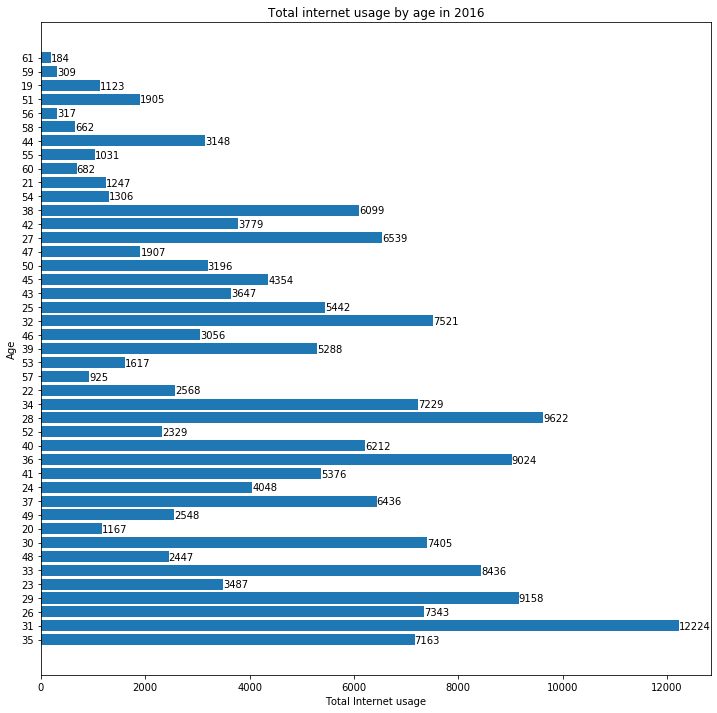


Select the visualisation type
1. Bar Chart: Daily internet usage by countries top 10.
2. Pie chart: Average daily time spent by Gender (male/female).
3. Horizontal Bar chart: Daily internet usage by age.
4. Scatter plots: Daily time spent on Ads and daily internet usage against Age.



Enter your visualisation choice or 0 to quit the program:  0




Select your choice of analysis:
1. Data Descriptive and Statistics
2. Data Visualisations



Enter your choice or 0 to quit:  0


In [6]:
# required packages
import matplotlib.pyplot as plt

# # define get_file() function
def get_file(filename):
    """
    @Author: A00280207
    Functions to retrieve Advertising data from the file.
    :param filename:string
        The pathname of the file containing the data
    :return:
        age_data : dict
            A dictionary containing as key_value pairs the age and the average daily internet usage.
        gender_data : dict
            A dictionary containing as key-value pairs the gender type and daily time spent(Pie Chart).
        countries: dict
            A dictionary containing a key-value pairs the country name and daily internet usage.
        ads_vs_internet : tuples
            A tuples containing the lists of daily time spent on ads and Daily internet usage.
        age_list : list
            A list containing age data.
        income_per_consumers: list
            a List containing average income per individuals in area.
    """
    # create an empty dictionaries
    age_data = {}  # dictionary containing the age and daily internet usage
    gender_data = {}  # dictionary containing the gender (male (0), female (1)) and daily time spent on ads
    countries= {} # dictionary containing the top countries by daily_internet_usage, keys as country, values as usage
    # create an empty lists
    ads_vs_internet = []  # tuples containing the list of daily time spent and the daily internet usage
    age_list = []  # containing age data
    income_per_consumer = []  # list containing income per consumers which interacts with the ads

    # try to open the file
    try:
        with open(filename, encoding='utf-8') as input_file:
            # read the headers (first line) and discard it
            headers = input_file.readline()

            # for each line in input_file
            for line in input_file:
                # split line into components variables
                daily_time, age, area_income, daily_internet_usage, ad_topic_line, city, male, country, \
                timestamp, clicked_on_ads = line.strip().split(",")

                # try to - Convert numeric components to integer and adding to the lists
                try:
                    daily_time = int(float(daily_time))
                    daily_internet_usage = int(float(daily_internet_usage))
                    area_income = int(float(area_income))

                    # add to income - >= 20000
                    if int(area_income) >= 20000:
                        income_per_consumer.append(int(float(area_income)))

                    # append into age_list
                    age_list.append(int(age))

                    # add it to the ads time spent and the daily internet usage
                    ads_vs_internet.append((daily_time, daily_internet_usage))

                    # adding the gender dict
                    if male not in gender_data:
                        gender_data[male] = daily_time
                    else:
                        gender_data[male] += daily_time

                    # adding to the age_data dict
                    if age not in age_data:
                        age_data[age] = daily_internet_usage
                    else:
                        age_data[age] += daily_internet_usage

                    # adding it to countries dictionary
                    if country not in countries:
                        countries[country] = daily_internet_usage
                    else:
                        countries[country] += daily_internet_usage

                except ValueError as value_error:
                    print(value_error)
                    print("Can not be added, contains the value error: ", line)

    except FileNotFoundError as fnf_error:
        print(fnf_error)

    return gender_data, age_data, ads_vs_internet, age_list, income_per_consumer, countries


# driver method
if __name__ == "__main__":

    # program response
    print("Program to analyse the global internet Advertising data, 2016 containing Clicks as business performance metrics")
    print("---"*30)
    print() # blank line
    # input filename
    get_data = get_file(input("Enter the filename: "))
    # filename = "---\\advertising.csv"


    # Program Menu - User selection of choice
    while True:  # keep going indefinitely
        print()  # blank line
        print("Select your choice of analysis:"
              "\n1. Data Descriptive and Statistics"
              "\n2. Data Visualisations")
        print()  # blank line

        # input user's choice
        user_choice = int(input("Enter your choice or 0 to quit: "))

        # if choice is 0 then quit the program
        if user_choice == 0: # quit program
            break

        elif user_choice == 1:  # Statistics & descriptive
            # Statistics Menu
            while True:  # keep going indefinitely
                print()  # blank line
                print("Chose the statistic types:"
                      "\n1. Descriptive: Total number of observation, Mean & Variance of Age & Income."
                      "\n2. Statistics: Correlation")
                print() # blank line

                # input statistics choice
                statistic_choice = int(input("Enter your choice of statistics or 0 to back out into main program: "))
                print() # blank line

                if statistic_choice == 0:  # to Back out from the Statistic Menu
                    break
                elif statistic_choice == 1:
                    print()
                    # check if there is any value that contain non-numeric value
                    print(f"The list values all numbers: {check_list_all_numbers(get_data[3])}")
                    # number of records available
                    print("Number of values are: ", len(get_data[3]))
                    # Average Age which had seen on the internet in 2016
                    print(f"The Average Age: {calculate_mean(get_data[3]):.1f}")
                    print(f"The Average Income per consumer: {calculate_mean(get_data[4]):.1f}")
                    # Calculate Variance
                    print(f"Age Variance: {calculate_variance(get_data[3]):.1f}")
                    print(f"Income Variance: {calculate_variance(get_data[4]):.1f}")

                elif statistic_choice == 2:
                    print(f"Correlation between Age and income (income per individual)"
                          f": {calculate_correlation(get_data[3], get_data[4]):.2f}")
                else:
                    print("Invalid input and Back out to the main choice.")

        elif user_choice == 2: # bar chart
            # Visualisation Menu
            while True: # keep going indefinitely
                print() # blank line
                print("Select the visualisation type"
                      "\n1. Bar Chart: Daily internet usage by countries top 10."
                      "\n2. Pie chart: Average daily time spent by Gender (male/female)."
                      "\n3. Horizontal Bar chart: Daily internet usage by age."
                      "\n4. Scatter plots: Daily time spent on Ads and daily internet usage against Age.")
                print() # blank line
                # input visualisations choice
                visualisation_choice = int(input("Enter your visualisation choice or 0 to quit the program: "))
                print() # blank line

                if visualisation_choice == 0:
                    break
                elif visualisation_choice == 1:
                    print("\nBar Chart: Daily internet usage by countries (top 10).")
                    print("---" * 25)
                    # processing the countries dictionary
                    # sorting the dictionary by items using "OrderedDict module from Collections"
                    from collections import OrderedDict
                    countries_sorted = OrderedDict(sorted(get_data[5].items()))
                    # selecting only top 10 countries using "itertools module"
                    import itertools
                    # initialising n to the first 10 countries
                    n = 10  # first 10 items
                    countries_top_10 = dict(itertools.islice(countries_sorted.items(), n))
                    print(countries_top_10)
                    print()  # blank line

                    # creating figure and axes
                    fig, ax = plt.subplots(figsize=(18, 10))
                    # set x and labels
                    ax.set_xlabel("Countries (top 10)")
                    ax.set_ylabel("Daily Internet usage (in minutes)")
                    # set the title
                    ax.set_title("Daily internet usage in countries (top 10) in 2016.")
                    # plotting bar chart
                    ax.bar(countries_top_10.keys(), countries_top_10.values())
                    # show chart
                    plt.show()
                    # save image
                    # fig.savefig("----AdBarChart.png", bbox_inches='tight')

                elif visualisation_choice == 2:  # pie
                    print("\nPie chart - Average daily time spent by Gender between "
                          "January and July 2016 globally")
                    print("---" * 30)
                    # Creating the list from Dictionary values and Keys - this is to only process the Gender labels of
                    # Male = 0 & Female = 1
                    daily_time_data = list(get_data[0].values())
                    gender_string_data = list(get_data[0].keys())
                    # enumerate() function to iterate over the gender_string_data (dict - keys) to
                    # change the labels for gender
                    for n, i in enumerate(gender_string_data):
                        if i == '0':
                            gender_string_data[n] = 'male'
                        else:
                            gender_string_data[n] = 'female'

                    # create figure and axes
                    fig, ax = plt.subplots(figsize=(12, 12))
                    # set the title
                    ax.set_title("Average daily time spent by Gender(Male, Female) "
                                 "from January to July-2016")
                    # plot - pie chart
                    ax.pie(daily_time_data, labels=gender_string_data, autopct="%.0f%%",
                           textprops=dict(color="black"),shadow=True)
                    # show plot
                    plt.show()
                    # save image
                    # fig.savefig("----AdPieChart.png", bbox_inches='tight')

                elif visualisation_choice == 3:  # Horizontal Bar chart
                    print("\nHorizontal bar chart - Daily internet usage by age"
                          " in 2016 (from january to July) globally")
                    print("---" * 30)
                    # create figure and axes
                    fig, ax = plt.subplots(figsize=(12, 12))
                    # set the title
                    ax.set_title("Total internet usage by age in 2016")
                    # set the x position - list comprehension
                    y_pos = [i for i in range(len(get_data[1]))]
                    # set the y ticks labels
                    ax.set_yticks(y_pos)
                    ax.set_yticklabels(get_data[1].keys())
                    # set the label on axis
                    ax.set_ylabel("Age")
                    ax.set_xlabel("Total Internet usage")

                    # displaying the each value per bar - enumerate() function
                    for index, value in enumerate(get_data[1].values()):
                        ax.text(value, index - 0.25, str(value))

                    # plotting the bar chart
                    ax.barh(y_pos, get_data[1].values(), align='center')
                    # show plot
                    plt.show()
                    # save image
#                     fig.savefig("---AdHorizontalBar.png", bbox_inches='tight')

                elif visualisation_choice == 4:  # Multiple Scatter plots
                    print("\nMultiple Scatter plots - Daily Time spend on Ads/internet by age "
                          "in 2016 (from january to July).")
                    print("---" * 30)
                    # create figure and axes
                    fig, ax = plt.subplots(figsize=(12, 12))
                    # reading the time_spent on ads from the tuples - list comprehension
                    time_on_ads = [value[0] for value in get_data[2]]
                    # get the internet_usage as the second value in tuple
                    internet_usage = [value[1] for value in get_data[2]]
                    # set th  x and y-axis labels
                    ax.set(xlabel="Age", ylabel="Total time spend daily (in minutes)")
                    # set the title
                    ax.set_title("Total time spent on Ads/Internet by Age.")
                    # plotting Scatter
                    ax.scatter(get_data[3], time_on_ads, marker=".")
                    ax.scatter(get_data[3], internet_usage, marker=".")
                    ax.legend(["Time Spent on Ads", "Daily Internet Usage"])
                    # show the chart
                    plt.show()
                    # save image
#                     fig.savefig("----sactterPlot.png", bbox_inches='tight')


                else:
                    print("Invalid input, try again.")

        else:
            print("Invalid input, try again.")

# Old version

In [ ]:
# required module
from math import sqrt, pi

# program response
print("------>>>>>>>>>>>> Program to analyse the Global Internet Advertising data from 2016 <<<<<<<<<<<<-------")
print()

# initialise the filename variable to input the file
filename = input("Enter the filename:")
# filename = 'C:\\Users\\User\\Documents\\AIT_AI\\Applied_Scripted_Languages\\advertising.csv'

# creating an empty lists as per the data attributes
daily_time_spent = [] # daily time spent on ads (mins)
age_list = [] # age of consumer who visit the ads
average_revenue_consumer = [] # average revenue per consumers
internet_usage = [] # average internet usage on daily basis in mins
topic_line = [] # ads topic line that is visited by consumer
cities = [] # consumer's city
gender = [] # consumer's sex
countries = [] # from which country the consumer comes from
timestamp_list = [] # timestamp when the consumer visit the site 
clicker_list = [] # if the consumer clicked on ads or not


# try to open the file 
try:
    with open(filename, encoding = 'utf-8') as input_file:
        # remove the headers or store the header separate into header variables
        headers = input_file.readline()
        
        # for each line in input_file
        for line in input_file:
            
            # try to split the line between components
            try:
                # read each line and split into each component in data file
                daily_time,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ads = line.split(",")
            
                # try to add it to the lists - daily time spent on ads in min
                try:
                    daily_time_spent.append(float(daily_time))
                except ValueError:
                    print("Unable to read an invalid data type so skipping: ", dailt_time)
                    
                # try to add it to a list - Aaverage revevnue income per consumer
                try:
                    average_revenue_consumer.append(float(area_income))
                except ValueError:
                    print("Unable to read an invalid data type so skipping: ", area_income)
                    
                # try to add it to a list - average daily internet usage in min per consumer
                try:
                    internet_usage.append(float(daily_internet_usage))
                except ValueError:
                    print("Unable to read an invalid data type so skipping: ", area_income)
                    
                # try to add it to a list - age of consumer
                try:
                    age_list.append(int(age))
                except ValueError:
                    print("Unable to read an invalid data type so skipping: ", age)
                
                # try to add it to a list - consumer's gender
                try:
                    gender.append(int(male))
                except ValueError:
                    print("Unable to read an invalid data type so skipping: ", male)
                    
                # try to add it to a list - click on ads
                try:
                    clicker_list.append(int(clicked_on_ads))
                except ValueError:
                    print("Unable to read an invalid data type so skipping: ", clicked_on_ads)
                
                # Lists that contain String type - texts
                topic_line.append(ad_topic_line)
                cities.append(city)
                countries.append(country)
                timestamp_list.append(timestamp)
                
                
            except ValueError:
                print(f"Incorrect format in line: {line}")
                


        print() # blank line
        
        
        # Analysing and displaying the result
        # try to analyse list - if the list is empty then TypeError
        try:
            # check if the values appended into the age list
            if len(age) == 0:
                print("No value to process, list is empty.")
                
            else:
                # 1. Age - what Majority of age that spend more/less time on internet ads
                print("1. Age Analysis: Oldest age (Maximum), youngest age (Minimum) and Age's Frequency of conusmer who spend time on ads.#")
                print("---"*25)
                # Number of values in chosen dataset
                print(f"The total numbers of values: {len(age_list)}")
                # Maximum - Oldest age
                print(f"The oldest (Maximum) age that spend time on internet ads: {max(age_list)}")
                # minimum - youngest age
                print(f"The youngest (Minimum) age that spend time on internet ads: {min(age_list)}")
    
                print() # blank line
                # Most frequent age which visits the internet advertising the most
                # create a sorted list of distinct values using set
                age_values = sorted(list(set(age_list)))
                # determine a frequency of each value - list comprehension
                frequencies = [age_list.count(value) for value in age_values]
                print("Age   Frequency") # frequency table header
    
                # for each values in age list
                for x, y in zip(age_values, frequencies):
                    print(f"{x:<5}   {y:>4}")
                    
                print() # blank line
                # Mode
                index = frequencies.index(max(frequencies))
                print(f"Most frequent age of consumer which visits the internet ads the mosrt (Mode): {age_values[index]}")
    
            
            
                print() # blank line
        
                # 2. Daily Time Spent on Ads in Minutes
                print("2. Daily Time Spent on Ads (in minutes): Mean & Median value.#")
                print("---"*25)

                # calculate and display the Mean
                print(f"Mean (average) of daily time spent on ads: {sum(daily_time_spent) / len(daily_time_spent):.1f}")
                    
                # Median
                # calculate the middle index
                mid_index = int(len(daily_time_spent) / 2)
                if len(daily_time_spent) % 2 == 1: # odd number
                    median = daily_time_spent[mid_index]
                    print(f"Median of Time spent on ads: {median}")
                    
                else: # even number
                    median = sum(daily_time_spent[mid_index-1 : mid_index+1]) / 2
                    print(f"Median of daily time spent on ads: {median}")
        
            
                print() # blank line
        
                # 3. Revenue per consumer 
                print("3. Revenue per consumer: Average, Median and Standard Deviation#")
                print("---"*25)

                # Mean
                print(f"Mean (average) revenue per consumers: {sum(average_revenue_consumer) / len(average_revenue_consumer):.1f}")
                
                # Median
                # calculate the mid_index
                mid_index = int(len(average_revenue_consumer) / 2)
                if len(average_revenue_consumer) % 2 == 1: # odd number
                    median = average_revenue_consumer[mid_index]
                    print(f"Median value of revenue per consumer: {median}")
                else: # even number
                    median = sum(average_revenue_consumer[mid_index-1 : mid_index+1]) / 2
                    print(f"Median value of revenue per consumer: {median}")
                    
                # calculate Standard Deviation = √∑(x−¯x )2 / n−1
                from math import sqrt
                # calculate mean of average revenue per consumer
                mean_consumer_rev = sum(average_revenue_consumer) / len(average_revenue_consumer)
                # calculate Deviations - using list comprehension
                deviations = [(x - mean_consumer_rev)**2 for x in average_revenue_consumer]
                # Standard Deviation
                std_dev = sqrt(sum(deviations) / (len(average_revenue_consumer) - 1))
                # display the std
                print(f"Standard Deviation of revvenue per consumers: {std_dev:.1f}")
                

                print() # blank line
                
                # 4. Correlation between: Age and daily time spent, Age and daily internet usage
                print("4. Corrleation: Age (IV) = x, daily internet usage (DV) = y, and Age(IV) and y = daily time spent(DV).#")
                print("---"*25)
    
                # 1. correlation between x = Age (Independent variable), y = daily internet usage (Dependent variable)
                #  Mean - Age, daily internet usage
                x_mean = sum(age_list) / len(age_list)
                y_mean = sum(internet_usage) / len(internet_usage)
    
                # create the list  of deviations - List comprehension
                x_deviations = [(x - x_mean) for x in age_list]
                y_deviations = [(y - y_mean) for y in internet_usage]
    
                # create the list of deviation multiplied - list comprehension
                xy_deviations = [(x*y) for (x, y) in zip(x_deviations, y_deviations)]
    
                ## create a list of deviation squared - list comprehension
                x_sqr_deviations = [(x - x_mean)**2 for x in age_list]
                y_sqr_deviations = [(y - y_mean)**2 for y in internet_usage]
    
                # correlation
                correlation = sum(xy_deviations) / (sqrt(sum(x_sqr_deviations)) * (sqrt(sum(y_sqr_deviations))))
                # display correlation
                print(f"Correlation between Daily internet usage (y) and Age (x): {correlation:.2f}")
                
    
                #2. Correlation: x = Age (IV) and y= Daily Time Spent (DV)
                y_timeSpent_mean = sum(daily_time_spent) / len(daily_time_spent)
    
                # Create the list of deviations - only for Daily time spent - list comprehension
                y_timeSpent_deviations = [(y - y_timeSpent_mean) for y in daily_time_spent]
                # create a list of deviationsmultiplied - list comprehension
                xy_age_timeSpent_deviations = [(x*y) for (x, y) in zip(x_deviations, y_timeSpent_deviations)]
                # create a list of deviation square - list comprehension
                y_sqr_timeSpent_deviations = [(y-y_timeSpent_mean)**2 for y in daily_time_spent]
                # correlation
                correlation2 = sum(xy_age_timeSpent_deviations) / (sqrt(sum(x_sqr_deviations)) * (sqrt(sum(y_sqr_timeSpent_deviations))))
                # display correlation
                print(f"Correlation between Daily time spent (y) and Age (x): {correlation2:.2f}")
         
        # TypeError (Exception)
        except TypeError as type_error:
            print(type_error)
        
# exccept the file not found error
except FileNotFoundError:
    print(f"Unable to open the file: {filename}")